# TIỀN XỬ LÝ DỮ LIỆU

### I. Tiền xử lý dữ liệu

### II.Làm sạch dữ liệu

#### 1.Kiểm tra dữ liệu khuyết thiếu

In [2]:
import numpy as np
import pandas as pd

###### Kiểm tra dữ liệu khuyết thiếu : isna(), isnull()
###### Kiểm tra dữ liệu không khuyết thiếu : notna(), notnull()

In [3]:
df = pd.DataFrame([[100, 6, np.nan], 
                  [9, 5, 12], 
                  [np.nan, np.nan, np.nan], 
                  [-3, 4, -200],
                  [2, 0, 7]])
df


,0,1,2
0,100.0,6.0,NaN
1,9.0,5.0,12.0
2,NaN,NaN,NaN
3,-3.0,4.0,-200.0
4,2.0,0.0,7.0


In [4]:
df.isna()
# True là vị trí thiếu

,0,1,2
0,False,False,True
1,False,False,False
2,True,True,True
3,False,False,False
4,False,False,False


In [5]:
df.notna()
# True là vị trí có giá trị

,0,1,2
0,True,True,False
1,True,True,True
2,False,False,False
3,True,True,True
4,True,True,True


In [6]:
df[df.columns[0]].isna()

0    False
1    False
2     True
3    False
4    False
Name: 0, dtype: bool

In [7]:
df.iloc[0].isna()

0    False
1    False
2     True
Name: 0, dtype: bool

#### 2.Xử lý dữ liệu khuyết thiếu

#####   Xóa dòng chứa ít nhất 1 giá trị bị khuyết thiếu: dropna()

In [8]:
df

,0,1,2
0,100.0,6.0,NaN
1,9.0,5.0,12.0
2,NaN,NaN,NaN
3,-3.0,4.0,-200.0
4,2.0,0.0,7.0


In [9]:
df.dropna()

,0,1,2
1,9.0,5.0,12.0
3,-3.0,4.0,-200.0
4,2.0,0.0,7.0


##### Xóa cột chứa ít nhất 1 giá trị khuyết thiếu dropna(axis=1)

In [10]:
df = pd.DataFrame([[100, 6, np.nan], 
                  [9, 5, 12], 
                  [np.nan, np.nan, np.nan], 
                  [-3, 4, -200],
                  [2, 0, 7]])
df.dropna(axis=1)

""
0
1
2
3
4


##### Xóa các dòng chứa toàn các giá trị khuyết thiếu dropna(how = 'all')

In [11]:
df = pd.DataFrame([[100, 6, np.nan], 
                  [9, 5, 12], 
                  [np.nan, np.nan, np.nan], 
                  [-3, 4, -200],
                  [2, 0, 7]])
df.dropna(how='all')

,0,1,2
0,100.0,6.0,NaN
1,9.0,5.0,12.0
3,-3.0,4.0,-200.0
4,2.0,0.0,7.0


##### Giữ lại những dòng có ít nhất n giá trị khuyết thiếu dropna(thresh=n)

In [12]:
df.dropna(thresh=1)

,0,1,2
0,100.0,6.0,NaN
1,9.0,5.0,12.0
3,-3.0,4.0,-200.0
4,2.0,0.0,7.0


##### Xóa những dòng nếu có dữ liệu khuyết thiếu trên một số cột nhất định: dropna(subet=[columns])

In [13]:
df = pd.DataFrame([[100, 6, np.nan], 
                  [9, 5, 12], 
                  [np.nan, np.nan, np.nan], 
                  [-3, 4, -200],
                  [2, 0, 7]])

In [14]:
df.dropna(subset=[0,2])

,0,1,2
1,9.0,5.0,12.0
3,-3.0,4.0,-200.0
4,2.0,0.0,7.0


##### Thay thế dữ liệu khuyết thiếu fillna()

##### Thay thế giá trị khuyết bằng 1 giá trị vô hướng fillna(value)
###### THay các số ít ảnh hưởng: 0 hoặc giá trị trung bình

In [15]:
df

,0,1,2
0,100.0,6.0,NaN
1,9.0,5.0,12.0
2,NaN,NaN,NaN
3,-3.0,4.0,-200.0
4,2.0,0.0,7.0


In [16]:
df.fillna(0)

,0,1,2
0,100.0,6.0,0.0
1,9.0,5.0,12.0
2,0.0,0.0,0.0
3,-3.0,4.0,-200.0
4,2.0,0.0,7.0


##### Thay thế giá trị khuyết bằng giá trị trước đó fillna(method='ffill')  kiểu dữ liệu chuỗi thời gian

In [17]:
df = pd.DataFrame([[100, 6, np.nan], 
                  [9, 5, 12], 
                  [np.nan, np.nan, np.nan], 
                  [-3, 4, -200],
                  [2, 0, 7]])

df.fillna(method = 'ffill')

,0,1,2
0,100.0,6.0,NaN
1,9.0,5.0,12.0
2,9.0,5.0,12.0
3,-3.0,4.0,-200.0
4,2.0,0.0,7.0


##### Thay thế giá trị khuyết bằng giá trị sau đó fillna(method='bfill')

In [18]:
df.fillna(method='bfill')

,0,1,2
0,100.0,6.0,12.0
1,9.0,5.0,12.0
2,-3.0,4.0,-200.0
3,-3.0,4.0,-200.0
4,2.0,0.0,7.0


##### Thay thế giá trị khuyết bằng các giá trị xác định trên mỗi cột: fillna(value = {columns:value})

In [19]:
df = pd.DataFrame([[100, 6, np.nan], 
                  [9, 5, 12], 
                  [np.nan, np.nan, np.nan], 
                  [-3, 4, -200],
                  [2, 0, 7]])

In [20]:
df.fillna(value={0:100,2:200})

,0,1,2
0,100.0,6.0,200.0
1,9.0,5.0,12.0
2,100.0,NaN,200.0
3,-3.0,4.0,-200.0
4,2.0,0.0,7.0


## III. Xử lý giá trị ngoại lai

### 1 Xác định dữ liệu ngoại lai

##### Phương pháp trực quan hóa Box plot, Scatter plot

In [21]:
points = pd.DataFrame([[100, 6], [9, 5], [3, 5], [1,-200],[2, 0], [3, -4], [-2, 5], [-1, -10]], columns = ['X', 'Y'])
points


,X,Y
0,100,6
1,9,5
2,3,5
3,1,-200
4,2,0
5,3,-4
6,-2,5
7,-1,-10


<AxesSubplot: xlabel='X', ylabel='Y'>

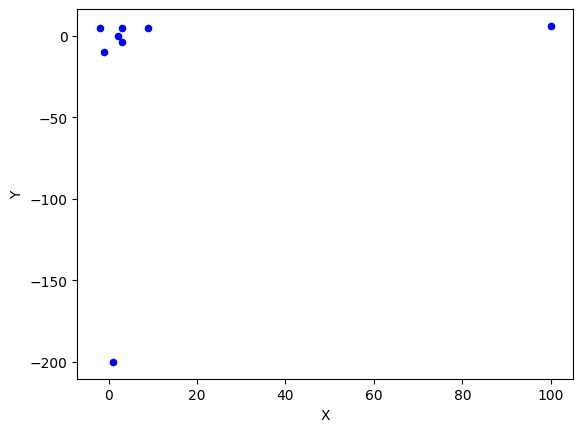

In [22]:
import matplotlib.pyplot as plt

points.plot.scatter(x='X',y = 'Y',c='blue')

##### Phương pháp toán học Z-score

In [23]:
df

,0,1,2
0,100.0,6.0,NaN
1,9.0,5.0,12.0
2,NaN,NaN,NaN
3,-3.0,4.0,-200.0
4,2.0,0.0,7.0


In [25]:
from scipy import stats

df  = df.fillna(0)
df

,0,1,2
0,100.0,6.0,0.0
1,9.0,5.0,12.0
2,0.0,0.0,0.0
3,-3.0,4.0,-200.0
4,2.0,0.0,7.0


In [26]:
z = stats.zscore(df)
z

,0,1,2
0,1.989925,1.185854,0.441327
1,-0.319809,0.790569,0.587623
2,-0.548245,-1.185854,0.441327
3,-0.624390,0.395285,-1.996943
4,-0.497481,-1.185854,0.526666


##### Xác định ngoại lai theo ngưỡng np.where(z>threshold)

In [28]:
noisy = np.where((z>1.2) | (z<-1.2))
print(noisy)

(array([0, 3], dtype=int64), array([0, 2], dtype=int64))


##### IQR Score

In [29]:
Q1 =df.quantile(0.25)
Q3 =df.quantile(0.75)
IQR = Q3-Q1
print(IQR)

0    9.0
1    5.0
2    7.0
dtype: float64


In [30]:
df

,0,1,2
0,100.0,6.0,0.0
1,9.0,5.0,12.0
2,0.0,0.0,0.0
3,-3.0,4.0,-200.0
4,2.0,0.0,7.0


In [32]:
noisy = (df<(Q1 - 1.5*IQR)) | (df>(Q3 + 1.5*IQR))
noisy

,0,1,2
0,True,False,False
1,False,False,False
2,False,False,False
3,False,False,True
4,False,False,False


### 2.Xử lý dữ liệu ngoại lai

Sửa: Tùy thuộc bài toán, yêu cầu cụ thể sẽ thay thế theo dữ liệu thực tế

##### xóa theo Z-score

In [33]:
z

,0,1,2
0,1.989925,1.185854,0.441327
1,-0.319809,0.790569,0.587623
2,-0.548245,-1.185854,0.441327
3,-0.624390,0.395285,-1.996943
4,-0.497481,-1.185854,0.526666


In [34]:
z = z[((z<1.2) & (z> -1.2)).all(axis=1)]
z

,0,1,2
1,-0.319809,0.790569,0.587623
2,-0.548245,-1.185854,0.441327
4,-0.497481,-1.185854,0.526666


##### Xóa theo IQR Score

In [35]:
df = df[~((df<(Q1 - 1.5*IQR)) | (df>(Q3 + 1.5*IQR))).any(axis=1)]
df

,0,1,2
1,9.0,5.0,12.0
2,0.0,0.0,0.0
4,2.0,0.0,7.0
